<a href="https://colab.research.google.com/github/moizarsalan/Digital-Image-Processing-Labs/blob/main/Lab_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Name: Abdul Moiz Arsalan**

### **Reg_no: B22F1086AI072**

### **Lab Instructor: Sir Rizwan Shah**

### **Course Instructor: Dr Abdul Jalil**

### **Lab: 07**



## **Step: 01 Load the Image:**

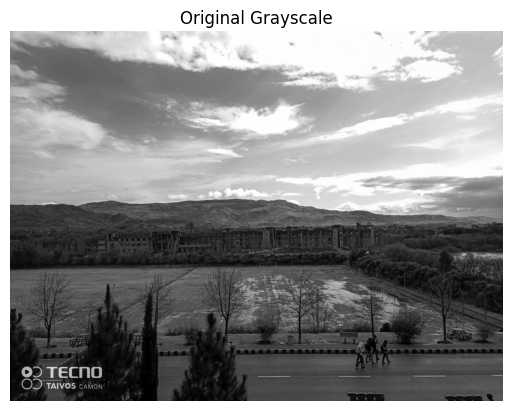

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image & convert to grayscale
img = cv2.imread('/content/WhatsApp Image 2025-02-27 at 15.46.24_53bc0be9.jpg', cv2.IMREAD_GRAYSCALE)

# Display original grayscale image
plt.imshow(img, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')
plt.show()


## **Step 2: Apply Fourier Transform & Display Spectrum**

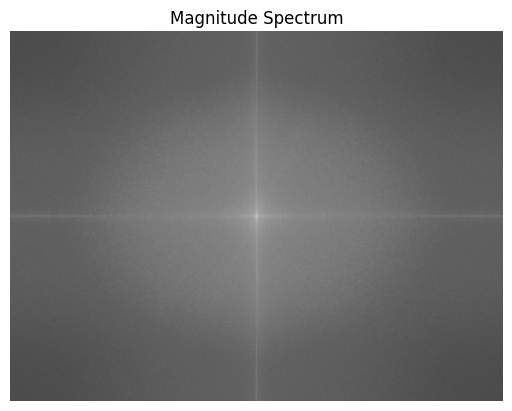

In [13]:
# Compute DFT & shift zero frequency to center
dft = np.fft.fft2(img)
dft_shift = np.fft.fftshift(dft)

# Compute magnitude spectrum
mag = 20 * np.log(np.abs(dft_shift) + 1)

# Display magnitude spectrum
plt.imshow(mag, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()


## **Step 3: Inverse Fourier Transform (Reconstruction)**

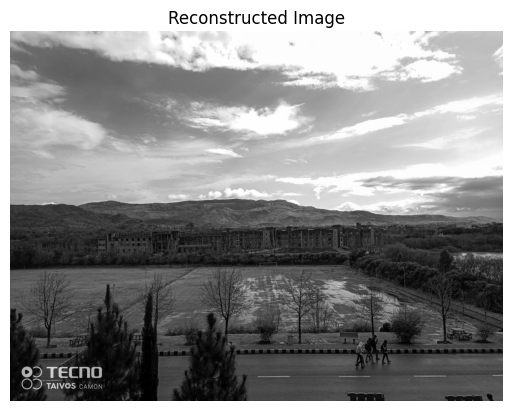

In [14]:
# Shift back & apply inverse DFT
idft_shift = np.fft.ifftshift(dft_shift)
reconstructed = np.fft.ifft2(idft_shift)
reconstructed = np.abs(reconstructed)

# Normalize for proper visualization
reconstructed = cv2.normalize(reconstructed, None, 0, 255, cv2.NORM_MINMAX)

# Display reconstructed image
plt.imshow(reconstructed, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()


## **Step 4: Low-Pass Filter (Smoothing)**

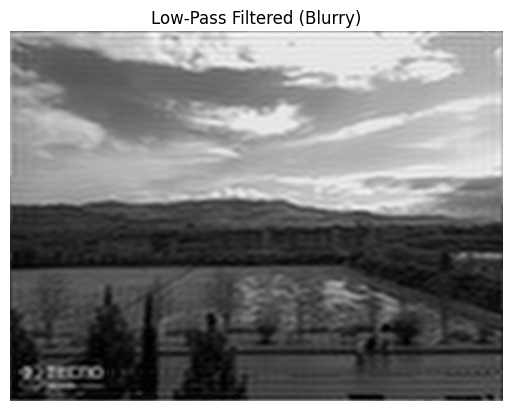

In [15]:
# Create LPF mask
rows, cols = img.shape
mask = np.zeros((rows, cols), np.uint8)
r = 50  # Radius of the low-pass filter
cy, cx = rows // 2, cols // 2
mask[cy - r:cy + r, cx - r:cx + r] = 1

# Apply mask & compute inverse DFT
low_pass = dft_shift * mask
idft_lp = np.fft.ifftshift(low_pass)
lp_img = np.fft.ifft2(idft_lp)
lp_img = np.abs(lp_img)

# Normalize & display
lp_img = cv2.normalize(lp_img, None, 0, 255, cv2.NORM_MINMAX)
plt.imshow(lp_img, cmap='gray')
plt.title('Low-Pass Filtered (Blurry)')
plt.axis('off')
plt.show()


## **Step: 05 Apply High pass filter**

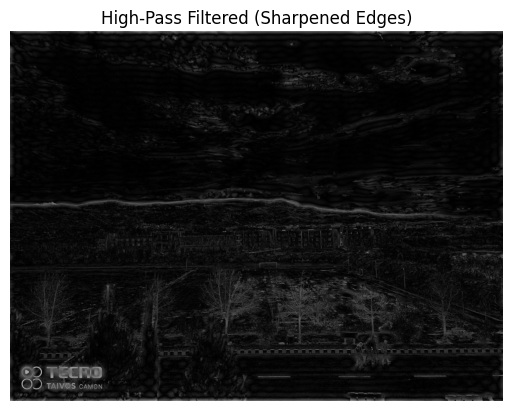

In [20]:
# Create HPF mask
mask = np.ones((rows, cols), np.uint8)
mask[cy - r:cy + r, cx - r:cx + r] = 0  # Remove low frequencies

# Apply mask & compute inverse DFT
high_pass = dft_shift * mask
idft_hp = np.fft.ifftshift(high_pass)
hp_img = np.fft.ifft2(idft_hp)
hp_img = np.abs(hp_img)

# Normalize & display
hp_img = cv2.normalize(hp_img, None, 0, 255, cv2.NORM_MINMAX)
plt.imshow(hp_img, cmap='gray')
plt.title('High-Pass Filtered (Sharpened Edges)')
plt.axis('off')
plt.show()
